# LoVoCCS Sample Overview

This gives an introduction into the overall LoVoCCS sample, as well as the properties of the clusters as taken from the MCXC catalogue. We don't acquire any data or perform any analyses in this notebook.

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.cosmology import LambdaCDM
from astropy.units import Quantity
from tqdm import tqdm

from xga.sourcetools import rad_to_ang

%matplotlib inline

## Setting up cosmology

We have chosen to use a concordance LambdaCDM model:

In [2]:
cosmo = LambdaCDM(70, 0.3, 0.7)

## Reading in the sample

This table summarises the basic information about the galaxy clusters, largely taken from the MCXC catalogue. It contains 144 galaxy clusters, selected to have $L^{0.1-2.4\rm{keV}}_{\rm{X, 500}}$ >$10^{44}$ ergs-1, and to lie within a redshift range of 0.03 > z > 0.12. Additionally a cut is made based on the extinction from the Milky Way, effectively excluding those clusters which fall in the plane of our galaxy.

The total sample (both southern and northern components) are being observed with DECam (in the south), and HSC (in the north). Our sample table contains the following information (all MCXC derived measured used the same concordance cosmology as we do):

* MCXC name - Simply the standard positional name with 
* <span style="color:red">LoVoCCS ID - A sequential, unique, integer identifier that increases with decreasing initial MCXC luminosity (i.e. the most luminous cluster has the ID of 1 [NEED TO CHECK WITH EVERYONE IF THEY WANT TO ADOPT THIS].</span>
* RA/Dec coordinates - The MCXC derived central coordinates of the clusters, in decimal degrees, using the J2000 epoch, and the FK5 coordinate frame.
* Redshift - <span style="color:red">Initial redshift values for the LoVoCCS clusters, taken from MCXC. [THIS SEEMS IMPORTANT TO INCLUDE BECAUSE THIS IS WHAT THEY WERE SELECTED ON, BUT WE DO WANT TO USE BETTER VALUES]</span>
* Overdensity Radius - The MCXC derived $R_{500}$. The radius at which the enclosed density is 500 times the critical density at the cluster redshift [Mpc].
* X-ray Luminosity - The $L^{0.1-2.4\rm{keV}}_{\rm{X, 500}}$ values, measured within 0.1-2.4 keV, from the MCXC catalogue [10$^{44}$ erg/s].
* Mass - The MCXC derived mass within $R_{500}$ [$10^{14} M_{\odot}$].


In [3]:
samp = pd.read_csv("../samples/lovoccs_southnorth.csv")
samp

,name,MCXC,LoVoCCSID,ra,dec,redshift,L500,M500,R500,alt_name,other_names,Notes
0,MCXCJ1558.3+2713,J1558.3+2713,0,239.585833,27.226944,0.0894,10.676087,8.1491,1.3803,RXCJ1558.3+2713,A2142,L
1,MCXCJ1510.9+0543,J1510.9+0543,1,227.729167,5.720000,0.0766,8.726709,7.2708,1.3344,A2029,A2029,NaN
2,MCXCJ0258.9+1334,J0258.9+1334,2,44.739583,13.579444,0.0739,6.088643,5.8488,1.2421,RXCJ0258.9+1334,A401,L
3,MCXCJ1348.8+2635,J1348.8+2635,3,207.220833,26.595556,0.0622,5.478067,5.5280,1.2236,RXCJ1348.8+2635,A1795,NaN
4,MCXCJ0041.8-0918,J0041.8-0918,4,10.458750,-9.301944,0.0555,5.100085,5.3163,1.2103,RXCJ0041.8-0918,A85,"L,losStr"
...,...,...,...,...,...,...,...,...,...,...,...,...
139,MCXCJ0448.2-2028,J0448.2-2028,139,72.050833,-20.469722,0.0720,1.004022,1.9513,0.8620,RXCJ0448.2-2028,A514,losStr
140,MCXCJ2323.8+1648,J2323.8+1648,140,350.972917,16.808889,0.0416,1.002026,1.9896,0.8760,A2589,A2589,NaN
141,MCXCJ1416.8-1158,J1416.8-1158,141,214.214583,-11.976111,0.0982,1.001648,1.9133,0.8491,RXCJ1416.8-1158,NaN,X
142,MCXCJ1459.0-0843,J1459.0-0843,142,224.764583,-8.725000,0.1043,1.001337,1.9047,0.8461,RXCJ1459.0-0843,NaN,NaN


## MCXC Property Distributions

This section just creates some summary histograms of the important properties of the clusters, as measured for the MCXC catalogue. We expect our reanalyses, with more modern telescopes and more data, to be considerably more precise (and accurate), but this provides important context of previous knowledge of these clusters.

## Redshift

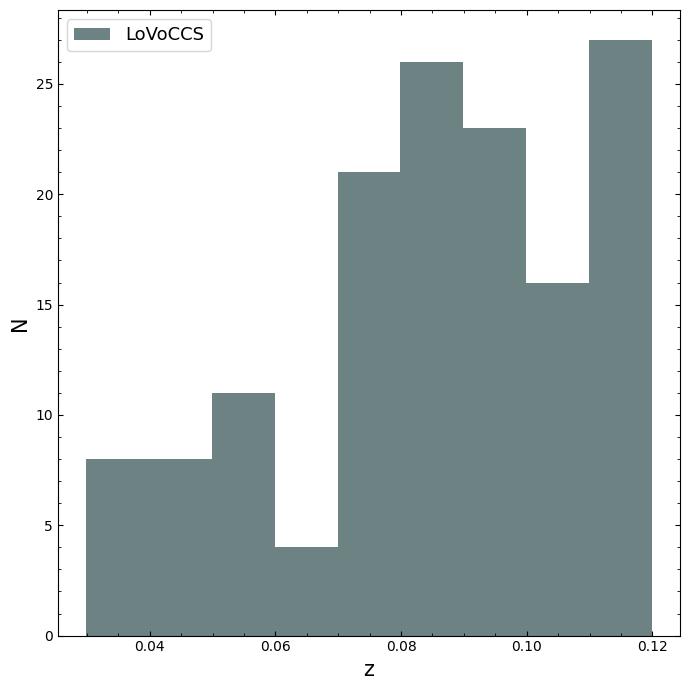

In [55]:
plt.figure(figsize=(7, 7))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)

plt.hist(samp['redshift'].values, bins='auto', color='darkslategrey', alpha=0.7, histtype='stepfilled', 
         label=r"LoVoCCS", linewidth=3)

plt.ylabel("N", fontsize=15)
plt.xlabel(r"z", fontsize=15)

plt.legend(fontsize=13, loc='best')

plt.tight_layout()
plt.savefig("../outputs/figures/lovoccs_mcxc_zdist.pdf")
plt.show()

## $R_{500}$

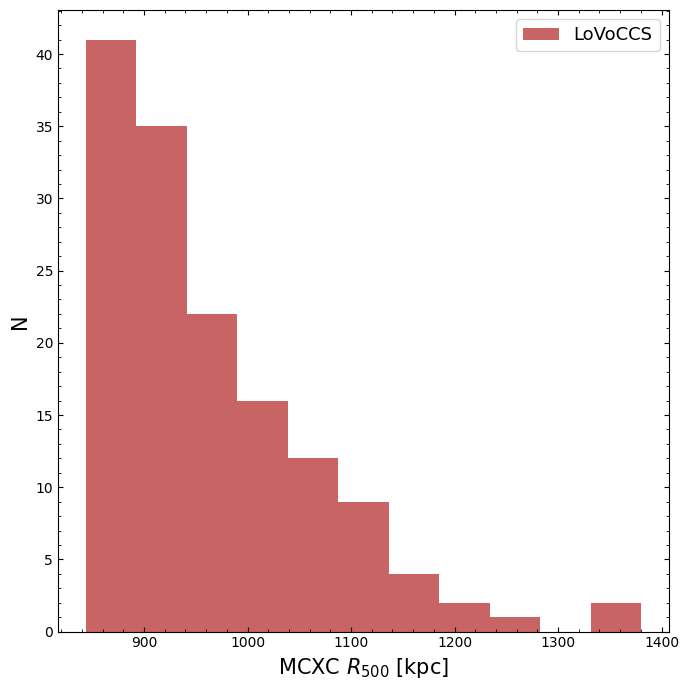

In [39]:
plt.figure(figsize=(7, 7))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)

plt.hist(samp['R500'].values*1000, bins='auto', color='firebrick', alpha=0.7, histtype='stepfilled', 
         label=r"LoVoCCS", linewidth=3)

plt.ylabel("N", fontsize=15)
plt.xlabel(r"MCXC $R_{500}$ [kpc]", fontsize=15)

plt.legend(fontsize=13, loc='best')

plt.tight_layout()
plt.savefig("../outputs/figures/lovoccs_mcxc_r500dist.pdf")
plt.show()

## Angular $R_{500}$

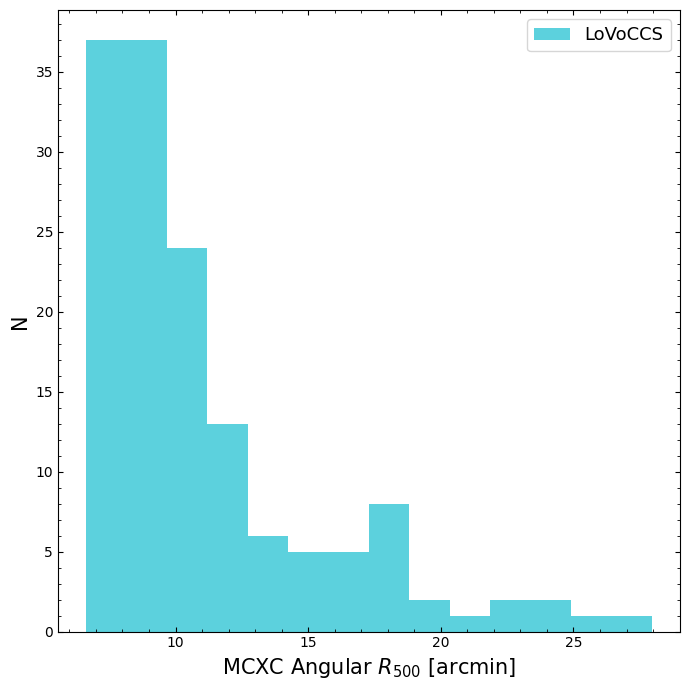

In [62]:
ang_r500 = rad_to_ang(Quantity(samp['R500'].values, 'Mpc'), samp['redshift'].values, cosmo)
ang_r500 = ang_r500.to('arcmin')

plt.figure(figsize=(7, 7))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)

plt.hist(ang_r500.value, bins='auto', color='tab:cyan', alpha=0.7, histtype='stepfilled', 
         label=r"LoVoCCS", linewidth=3)

plt.ylabel("N", fontsize=15)
plt.xlabel(r"MCXC Angular $R_{500}$ [arcmin]", fontsize=15)

plt.legend(fontsize=13, loc='best')

plt.tight_layout()
plt.savefig("../outputs/figures/lovoccs_mcxc_angr500dist.pdf")
plt.show()

### $L^{0.1-2.4\rm{keV}}_{\rm{X, 500}}$

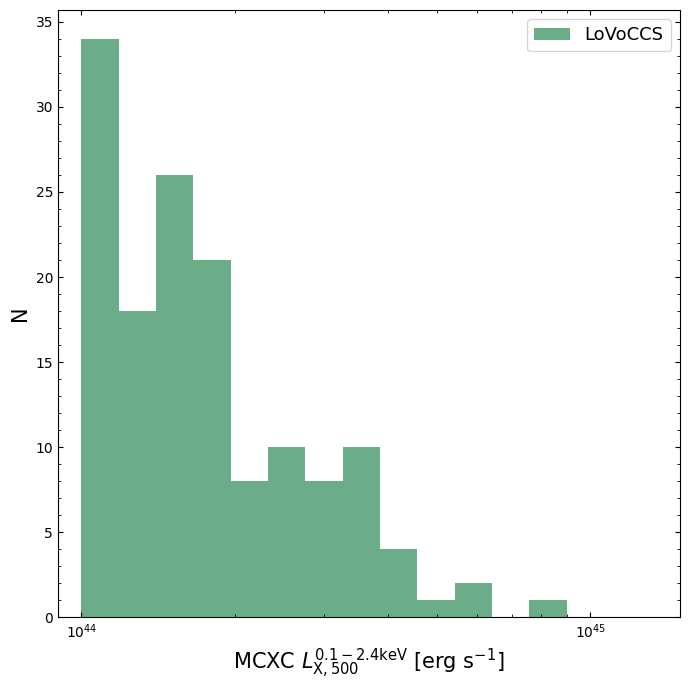

In [35]:
l_bins = np.logspace(44, 45.1, 15, endpoint=False)

plt.figure(figsize=(7, 7))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)

plt.hist(samp['L500'].values*1e+44, bins=l_bins, color='seagreen', alpha=0.7, histtype='stepfilled', 
         label=r"LoVoCCS", linewidth=3)

plt.ylabel("N", fontsize=15)
plt.xlabel(r"MCXC $L^{0.1-2.4\rm{keV}}_{\rm{X, 500}}$ [erg s$^{-1}$]", fontsize=15)

plt.xlim(9e+43, 1.5e+45)
plt.xscale('log')
plt.legend(fontsize=13, loc='best')

plt.tight_layout()
plt.savefig("../outputs/figures/lovoccs_mcxc_lxdist.pdf")
plt.show()

## $M_{500}$

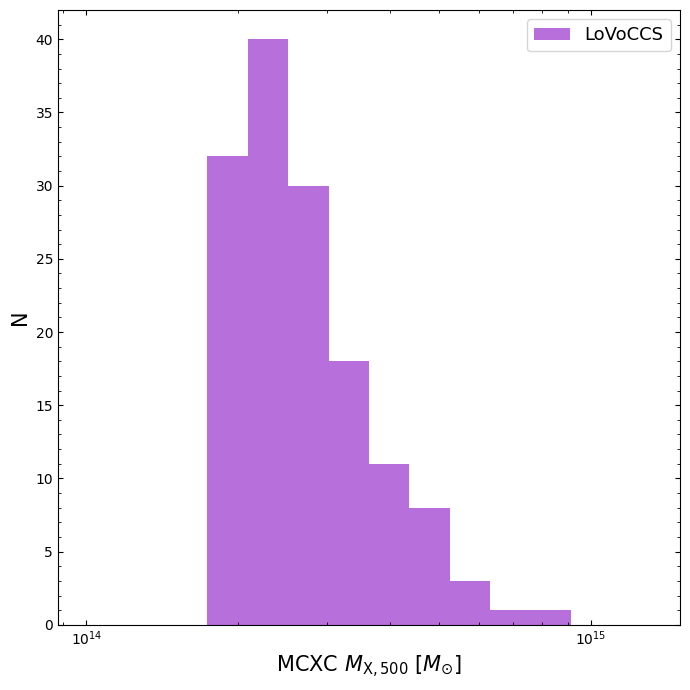

In [54]:
m_bins = np.logspace(14, 15.2, 15, endpoint=False)

plt.figure(figsize=(7, 7))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)

plt.hist(samp['M500'].values*1e+14, bins=m_bins, color='darkorchid', alpha=0.7, histtype='stepfilled', 
         label=r"LoVoCCS", linewidth=3)

plt.ylabel("N", fontsize=15)
plt.xlabel(r"MCXC $M_{\rm{X, 500}}$ [$M_{\odot}$]", fontsize=15)

# plt.xlim(9e+43, 1.5e+45)
plt.xscale('log')
plt.legend(fontsize=13, loc='best')

plt.tight_layout()
plt.savefig("../outputs/figures/lovoccs_mcxc_mdist.pdf")
plt.show()

## Visualisation of RA-Dec Positions

This makes a simple plot of cluster positions on the sky, with the colour of each point set by the redshift of the object. It doesn't tell us much scientifically, but does give context as to where the clusters are located:

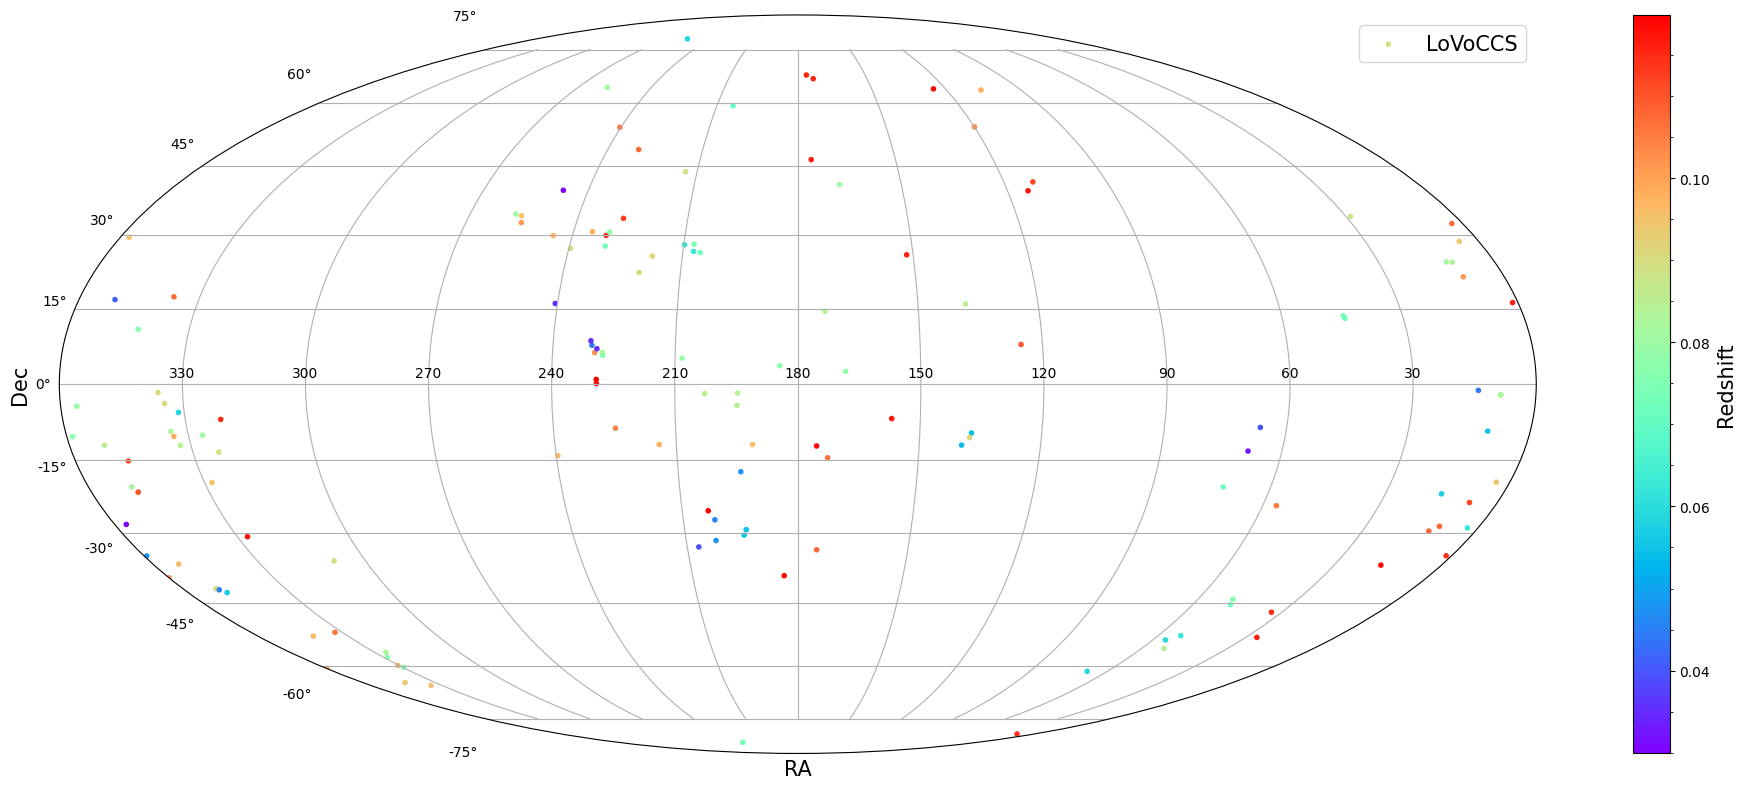

In [63]:
# Extract the RAs and Decs, shift them to the flipped x-axis astronomy convention, convert to radians
lovoccs_ra = Quantity(samp['ra'].values-180, 'deg')
lovoccs_ra = -lovoccs_ra 
lovoccs_ra = lovoccs_ra.to('rad')
lovoccs_dec = Quantity(samp['dec'].values, 'deg').to('rad')

# Setting up the figure
fig = plt.figure(figsize=(20, 8))
# Adding a subplot specifically with the Mollweide projection
ax = fig.add_subplot(111, projection='mollweide' )
# Add all of the RA-Dec pairs as dots
sc = ax.scatter(lovoccs_ra, lovoccs_dec, marker='.', c=samp['redshift'], label='LoVoCCS', cmap='rainbow')

# Set up a grid and custom hour labels for the RA axis
ax.grid(True)
ax.set_xticklabels(['330','300','270','240','210','180','150','120','90','60','30'])
# Create x and y axis labels
plt.xlabel('RA', fontsize=15)
plt.ylabel('Dec', fontsize=15)

cb = plt.colorbar(sc)
cb.set_label(label='Redshift', fontsize=15)
cb.ax.minorticks_on()
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('../outputs/figures/lovoccs_radec.pdf')
plt.show()